In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext watermark
%watermark

Last updated: 2024-06-25T22:53:22.275613-04:00

Python implementation: CPython
Python version       : 3.12.2
IPython version      : 8.22.2

Compiler    : MSC v.1937 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 167 Stepping 1, GenuineIntel
CPU cores   : 16
Architecture: 64bit



In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.float_format', lambda x: '%.3f' % x)

%matplotlib inline
%watermark -w
%watermark -iv

Watermark: 2.4.3

matplotlib: 3.8.3
numpy     : 1.26.4
pandas    : 2.2.1
seaborn   : 0.13.2



In [3]:
sns.set_style('ticks')

warnings.filterwarnings('ignore')

# 1. DADOS

In [4]:
# Data

data = pd.read_csv("microdados_enem_2023/DADOS/MICRODADOS_ENEM_2023.csv", encoding='latin', sep = ';')

In [5]:
data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [6]:
# Selecao das colunas de interesse
# (remocao de algumas variaveis que pela analise inicial, nao fazem sentido mante-las)

colunas1 = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
            'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
           'IN_TREINEIRO', 
           'CO_MUNICIPIO_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT',
           ]

colunas2 = data.loc[:,'Q001':'Q025'].columns.to_list()
colunas3 = colunas1 + colunas2

data_tmp3 = data[colunas3]

In [7]:
def faltou(coluna1):
    if coluna1 == 1 or coluna1 == 2:
        return 'present'
    else:
        return 'falta'

data_tmp3['target'] = data_tmp3['TP_PRESENCA_CN'].apply(faltou)

data_tmp3.head()

,NU_INSCRICAO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,IN_TREINEIRO,CO_MUNICIPIO_PROVA,TP_PRESENCA_CN,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,target
0,210059085136,14,M,2,1,1,17,0,5300108,0,...,C,B,B,A,B,B,A,A,B,falta
1,210059527735,12,M,2,1,1,16,0,5300108,0,...,A,B,B,A,A,C,A,D,B,falta
2,210061103945,6,F,1,1,1,0,0,4305108,1,...,A,A,B,A,A,A,A,A,B,present
3,210060214087,2,F,1,3,2,0,0,2304400,1,...,A,A,B,A,A,D,A,A,B,present
4,210059980948,3,F,1,3,2,0,0,2311306,1,...,A,A,B,A,A,B,A,A,A,present


# 2. ANALISE DOS DADOS EM RELACAO A VARIAVEL ALVO

In [8]:
# Quantidade de alunos faltantes

tabela_pres_falta = data_tmp3['target'].value_counts().reset_index()
tabela_pres_falta['PROP'] = tabela_pres_falta['count']/tabela_pres_falta['count'].sum()
tabela_pres_falta

,target,count,PROP
0,present,2694639,0.685
1,falta,1239316,0.315


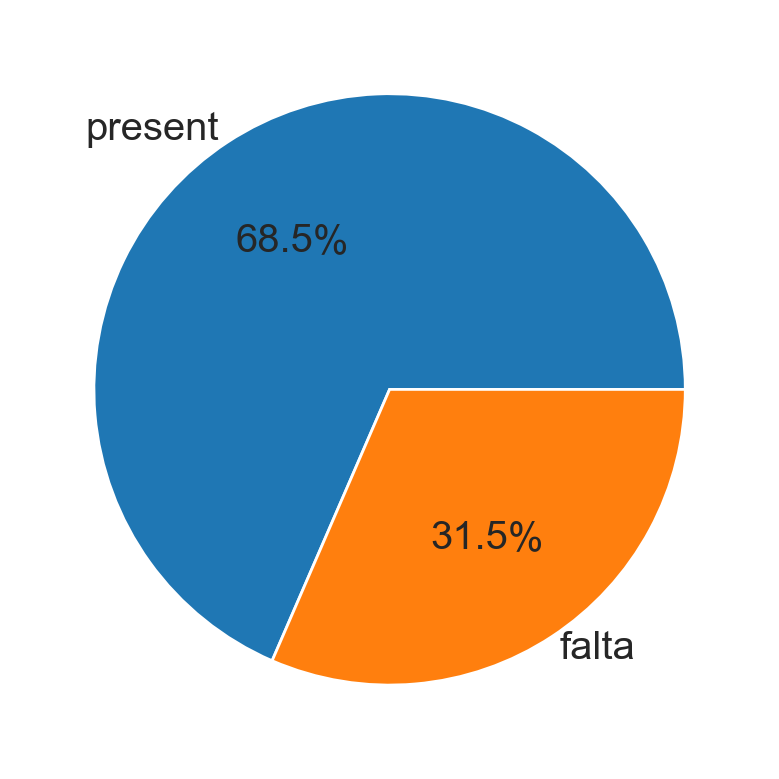

In [9]:
plt.pie(tabela_pres_falta['PROP'], labels=tabela_pres_falta['target'],
        labeldistance=1.05, autopct='%.1f%%', wedgeprops={'linewidth':1.0, 'edgecolor':'white'},
        textprops={'size':'x-large'})
plt.show()

- 31.5% dos inscritos faltaram na data da prova.

In [12]:
# Faixa etaria

age_categories = {
    1: "Menor de 17 anos",
    2: "17 anos",
    3: "18 anos",
    4: "19 anos",
    5: "20 anos",
    6: "21 anos",
    7: "22 anos",
    8: "23 anos",
    9: "24 anos",
    10: "25 anos",
    11: "Entre 26 e 30 anos",
    12: "Entre 31 e 35 anos",
    13: "Entre 36 e 40 anos",
    14: "Entre 41 e 45 anos",
    15: "Entre 46 e 50 anos",
    16: "Entre 51 e 55 anos",
    17: "Entre 56 e 60 anos",
    18: "Entre 61 e 65 anos",
    19: "Entre 66 e 70 anos",
    20: "Maior de 70 anos"
}

dados_faixa_etaria = data_tmp3[['TP_FAIXA_ETARIA', 'target']]
dados_faixa_etaria['TP_FAIXA_ETARIA'] = dados_faixa_etaria['TP_FAIXA_ETARIA'].map(age_categories)
dados_faixa_etaria = dados_faixa_etaria.groupby(['TP_FAIXA_ETARIA', 'target']).size().reset_index()
dados_faixa_etaria.columns = ['TP_FAIXA_ETARIA', 'TARGET', 'QTDE']


dados_faixa_etaria2 = dados_faixa_etaria.pivot_table(index = 'TP_FAIXA_ETARIA', columns='TARGET', values='QTDE')
dados_faixa_etaria2['PROP_FALTA'] = dados_faixa_etaria2['falta'] / (dados_faixa_etaria2.sum(axis=1)) * 100
dados_faixa_etaria2['PROP_PRESENCA'] = 100 - dados_faixa_etaria2['PROP_FALTA']


dados_faixa_etaria2

TARGET,falta,present,PROP_FALTA,PROP_PRESENCA
TP_FAIXA_ETARIA,,,,
17 anos,129064.000,624736.000,17.122,82.878
18 anos,218994.000,686053.000,24.197,75.803
19 anos,137930.000,293662.000,31.958,68.042
20 anos,97237.000,170146.000,36.366,63.634
21 anos,74143.000,109258.000,40.427,59.573
22 anos,59720.000,78164.000,43.312,56.688
23 anos,51806.000,60007.000,46.333,53.667
24 anos,44440.000,46919.000,48.643,51.357
25 anos,36818.000,36309.000,50.348,49.652


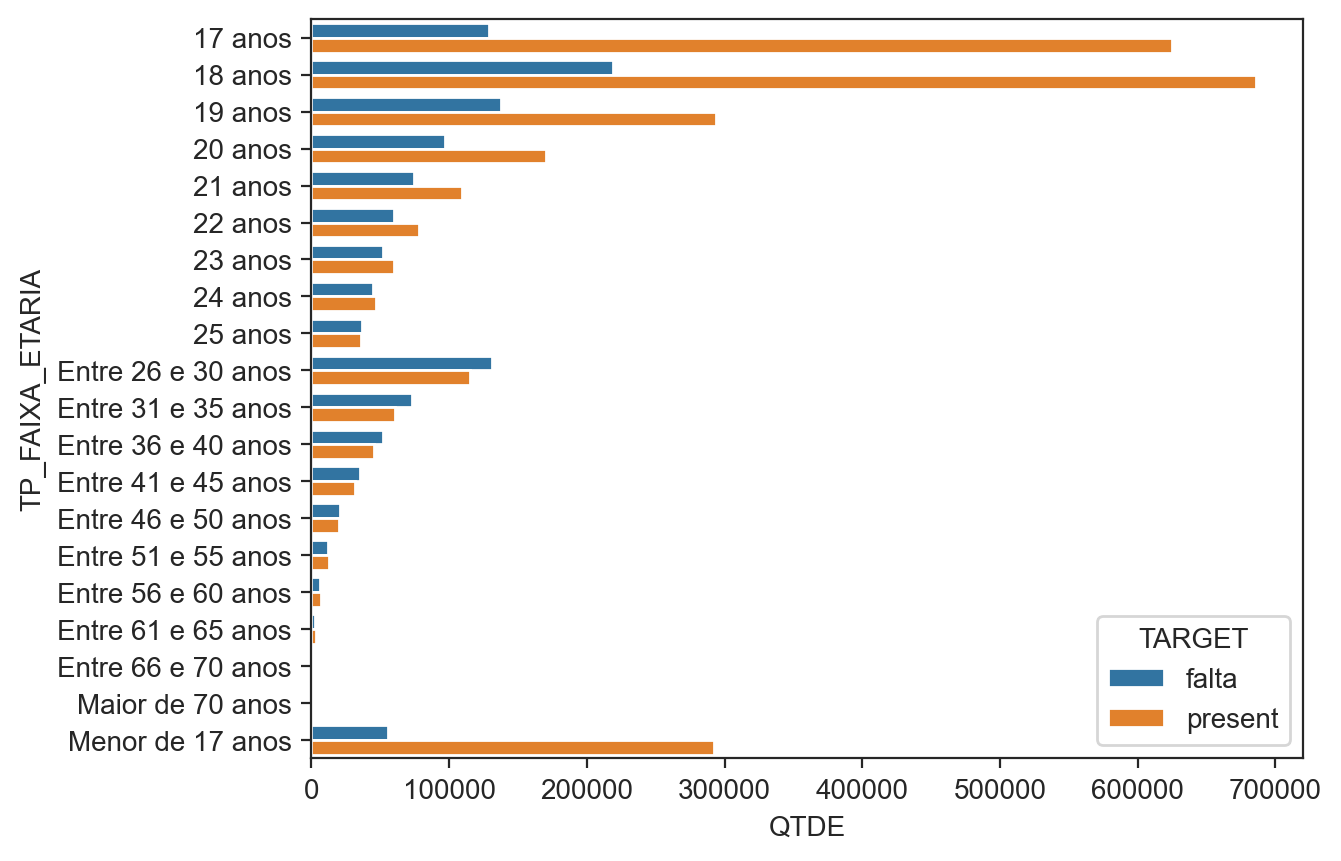

In [15]:
sns.barplot(y = 'TP_FAIXA_ETARIA', x = 'QTDE', hue = 'TARGET', data = dados_faixa_etaria , ci = None)
plt.show()

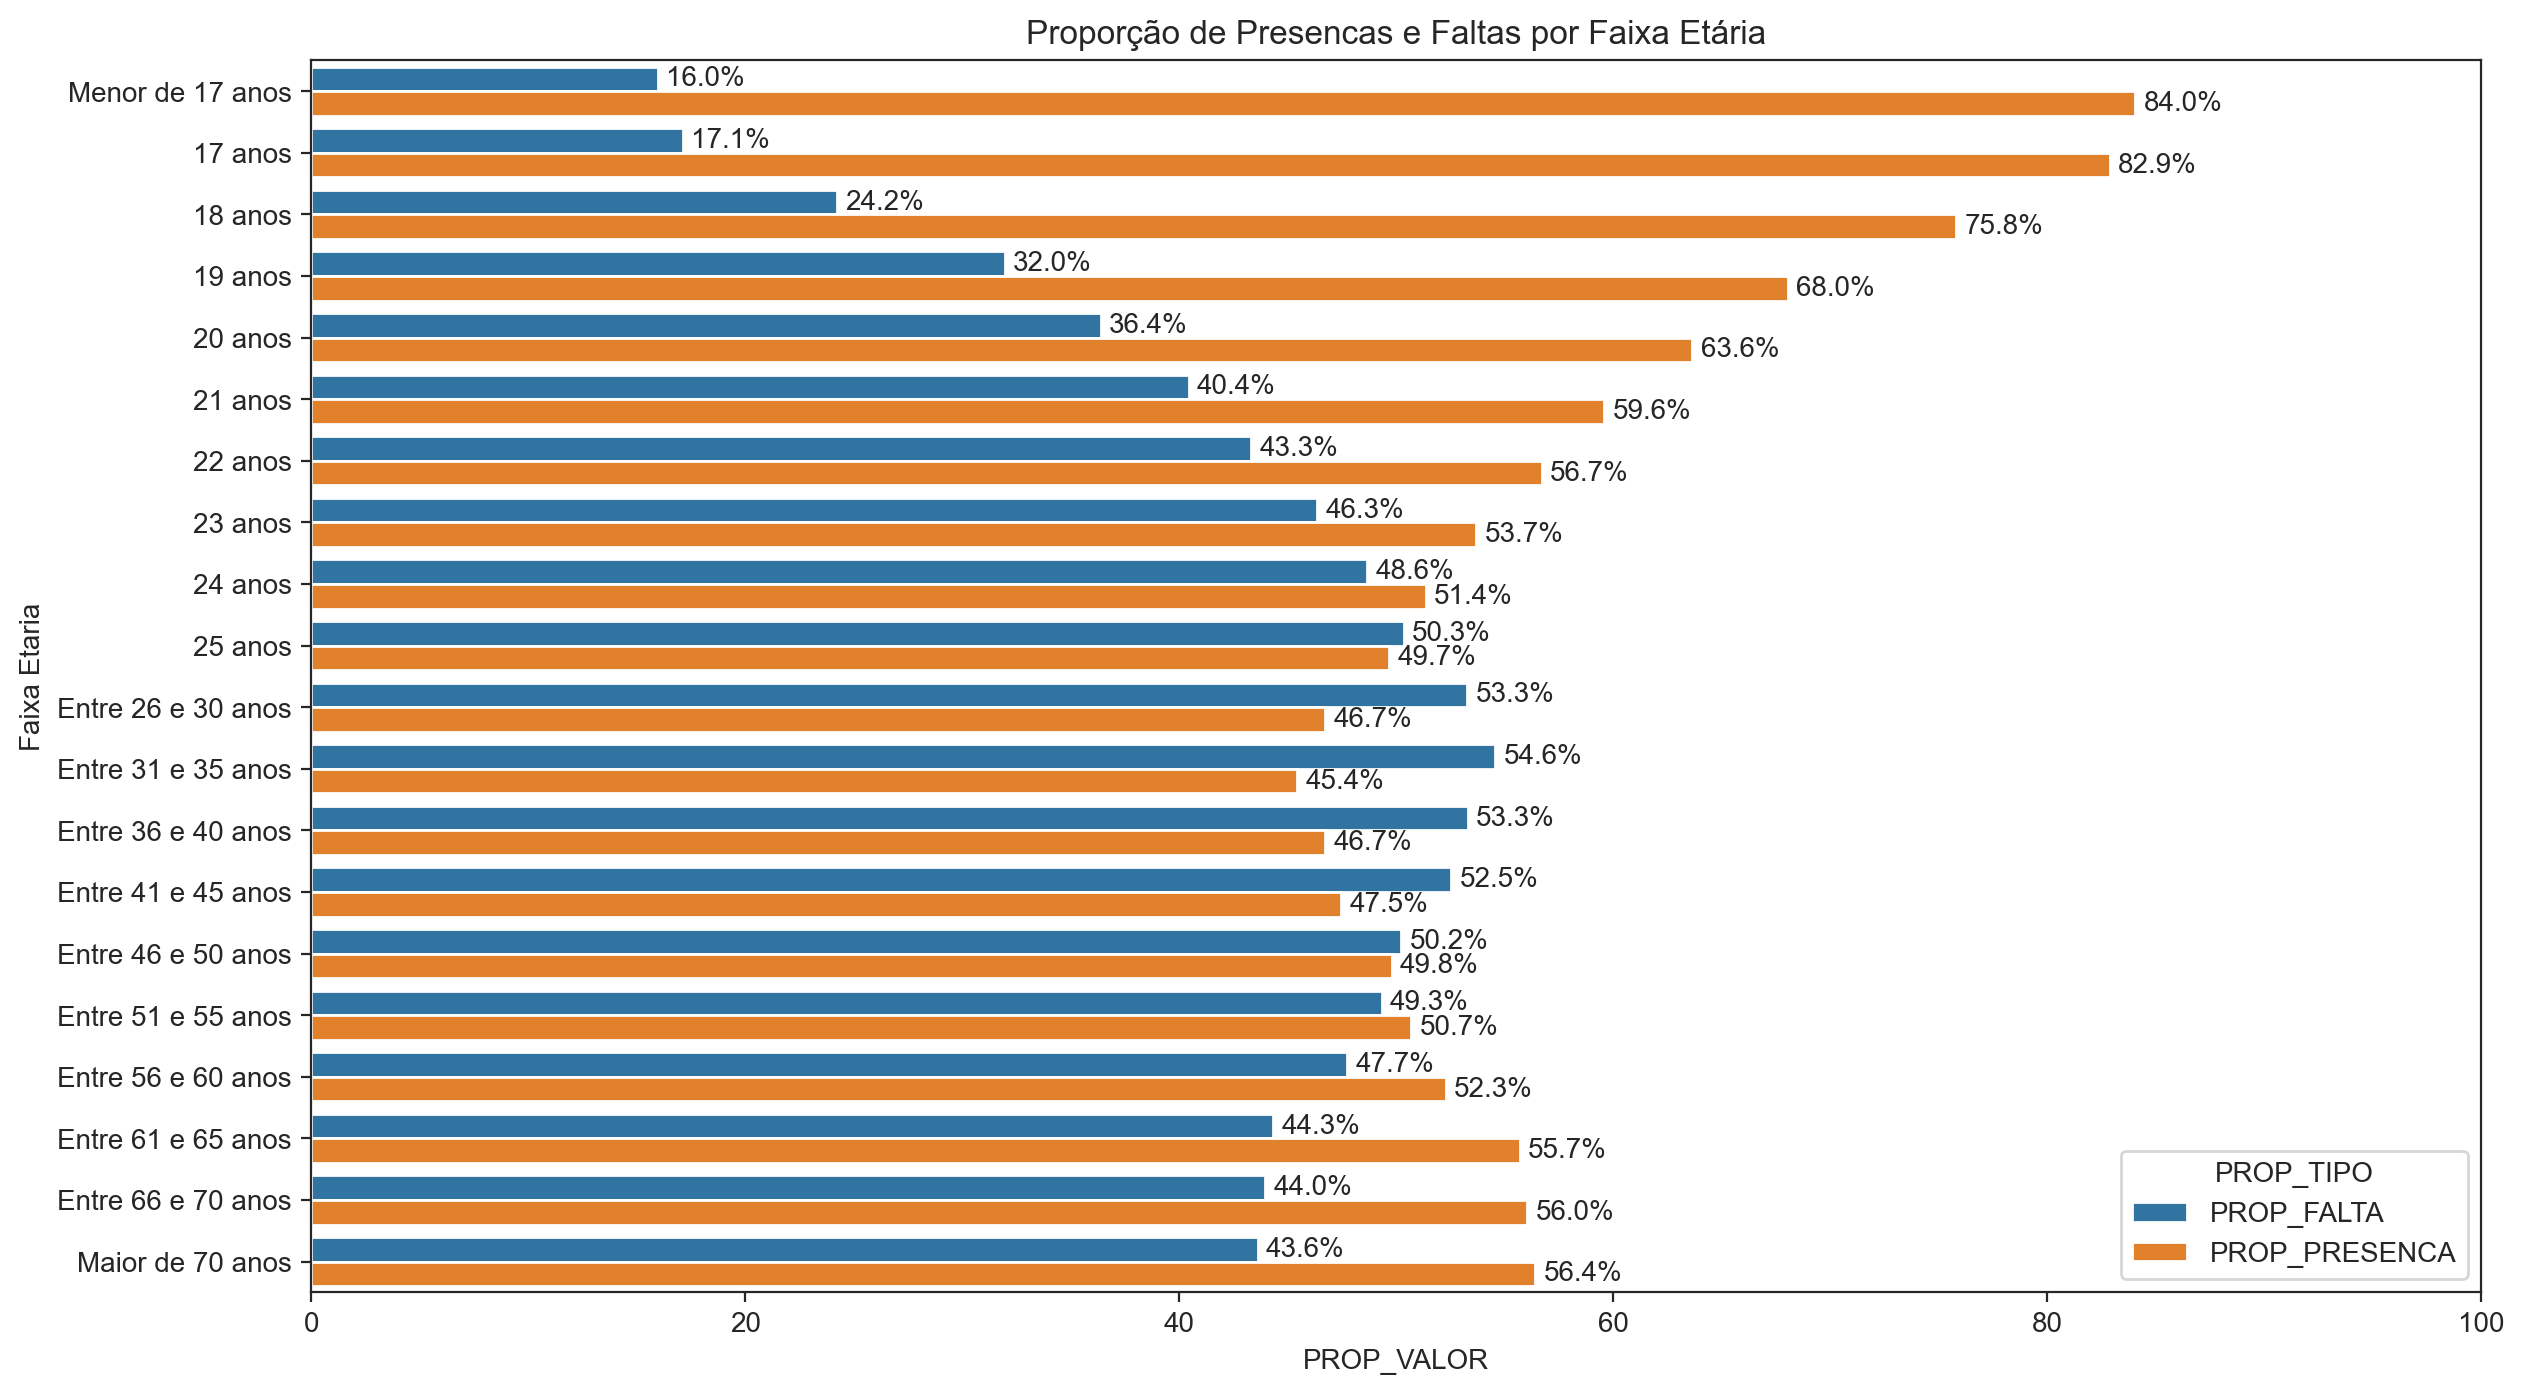

In [16]:
df_selected = dados_faixa_etaria2[['PROP_FALTA', 'PROP_PRESENCA']]
df_selected = df_selected.reset_index()
df_long = pd.melt(df_selected, id_vars = ['TP_FAIXA_ETARIA'], var_name = 'PROP_TIPO', value_name = 'PROP_VALOR')


plt.figure(figsize=(14, 8))

ordenacao_faixas = [age_categories[i] for i in range(1,21)]
ax = sns.barplot(y='TP_FAIXA_ETARIA', x='PROP_VALOR', hue = 'PROP_TIPO', data=df_long, order=ordenacao_faixas)

for i in ax.containers:
    ax.bar_label(i,fmt='%.1f%%', label_type = 'edge', padding=3)
    

plt.xlim(0, 100)
plt.ylabel('Faixa Etaria')
plt.title('Proporção de Presencas e Faltas por Faixa Etária')
#plt.legend()

plt.show()

- Interessante notar que, em numeros absolutos, conforme o aumento da idade, diferenca entre a quantidade de presencas e faltas diminui. 
- A partir de 25 anos, a diferenca e minima ou, em muitos casos, ha um maior numero de ausentes do que de presentes.

In [17]:
# TP_SEXO

dados_sexo_target = data_tmp3[['TP_SEXO', 'target']]
dados_sexo_target2 = dados_sexo_target.groupby(['TP_SEXO', 'target']).size().reset_index()
dados_sexo_target2.columns = ['TP_SEXO', 'target', 'QTDE']

dados_sexo_target2['PROP'] = dados_sexo_target2.groupby('TP_SEXO')['QTDE'].transform(lambda x: x / x.sum() * 100)
dados_sexo_target2

,TP_SEXO,target,QTDE,PROP
0,F,falta,758597,31.462
1,F,present,1652588,68.538
2,M,falta,480719,31.569
3,M,present,1042051,68.431


In [18]:
# Teste para saber se existe diferenca entre os dois grupos
from scipy.stats import chi2_contingency


tabela_contigencia = pd.pivot_table(dados_sexo_target2, values = 'QTDE', index = 'target', columns='TP_SEXO')
chi2, p, dof, expected = chi2_contingency(tabela_contigencia)

print(f"Qui-quadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Tabela Esperada:")
print(expected)

Qui-quadrado: 4.959608043486767
p-valor: 0.025946087755653255
Graus de liberdade: 1
Tabela Esperada:
[[ 759596.93221199  479719.06778801]
 [1651588.06778801 1043050.93221199]]


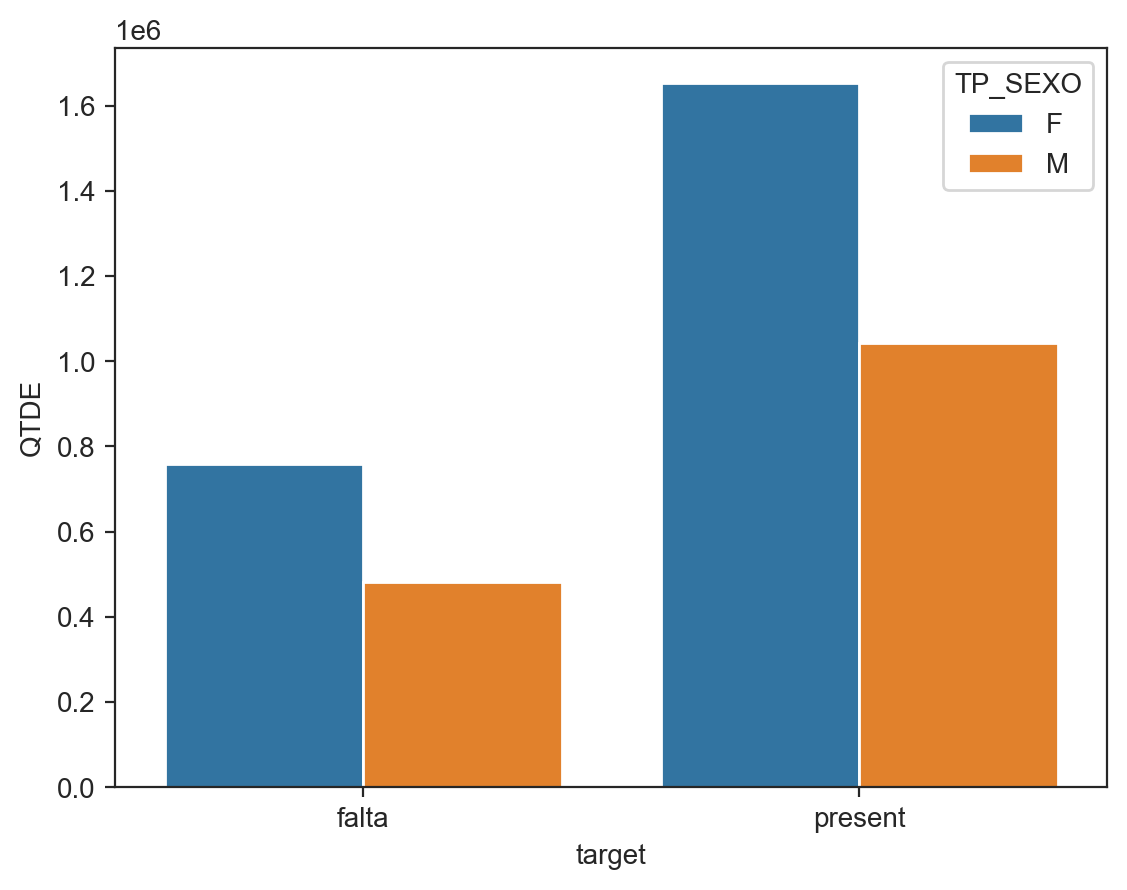

In [19]:

ax = sns.barplot(x = 'target', y = 'QTDE', hue = 'TP_SEXO', data = dados_sexo_target2)

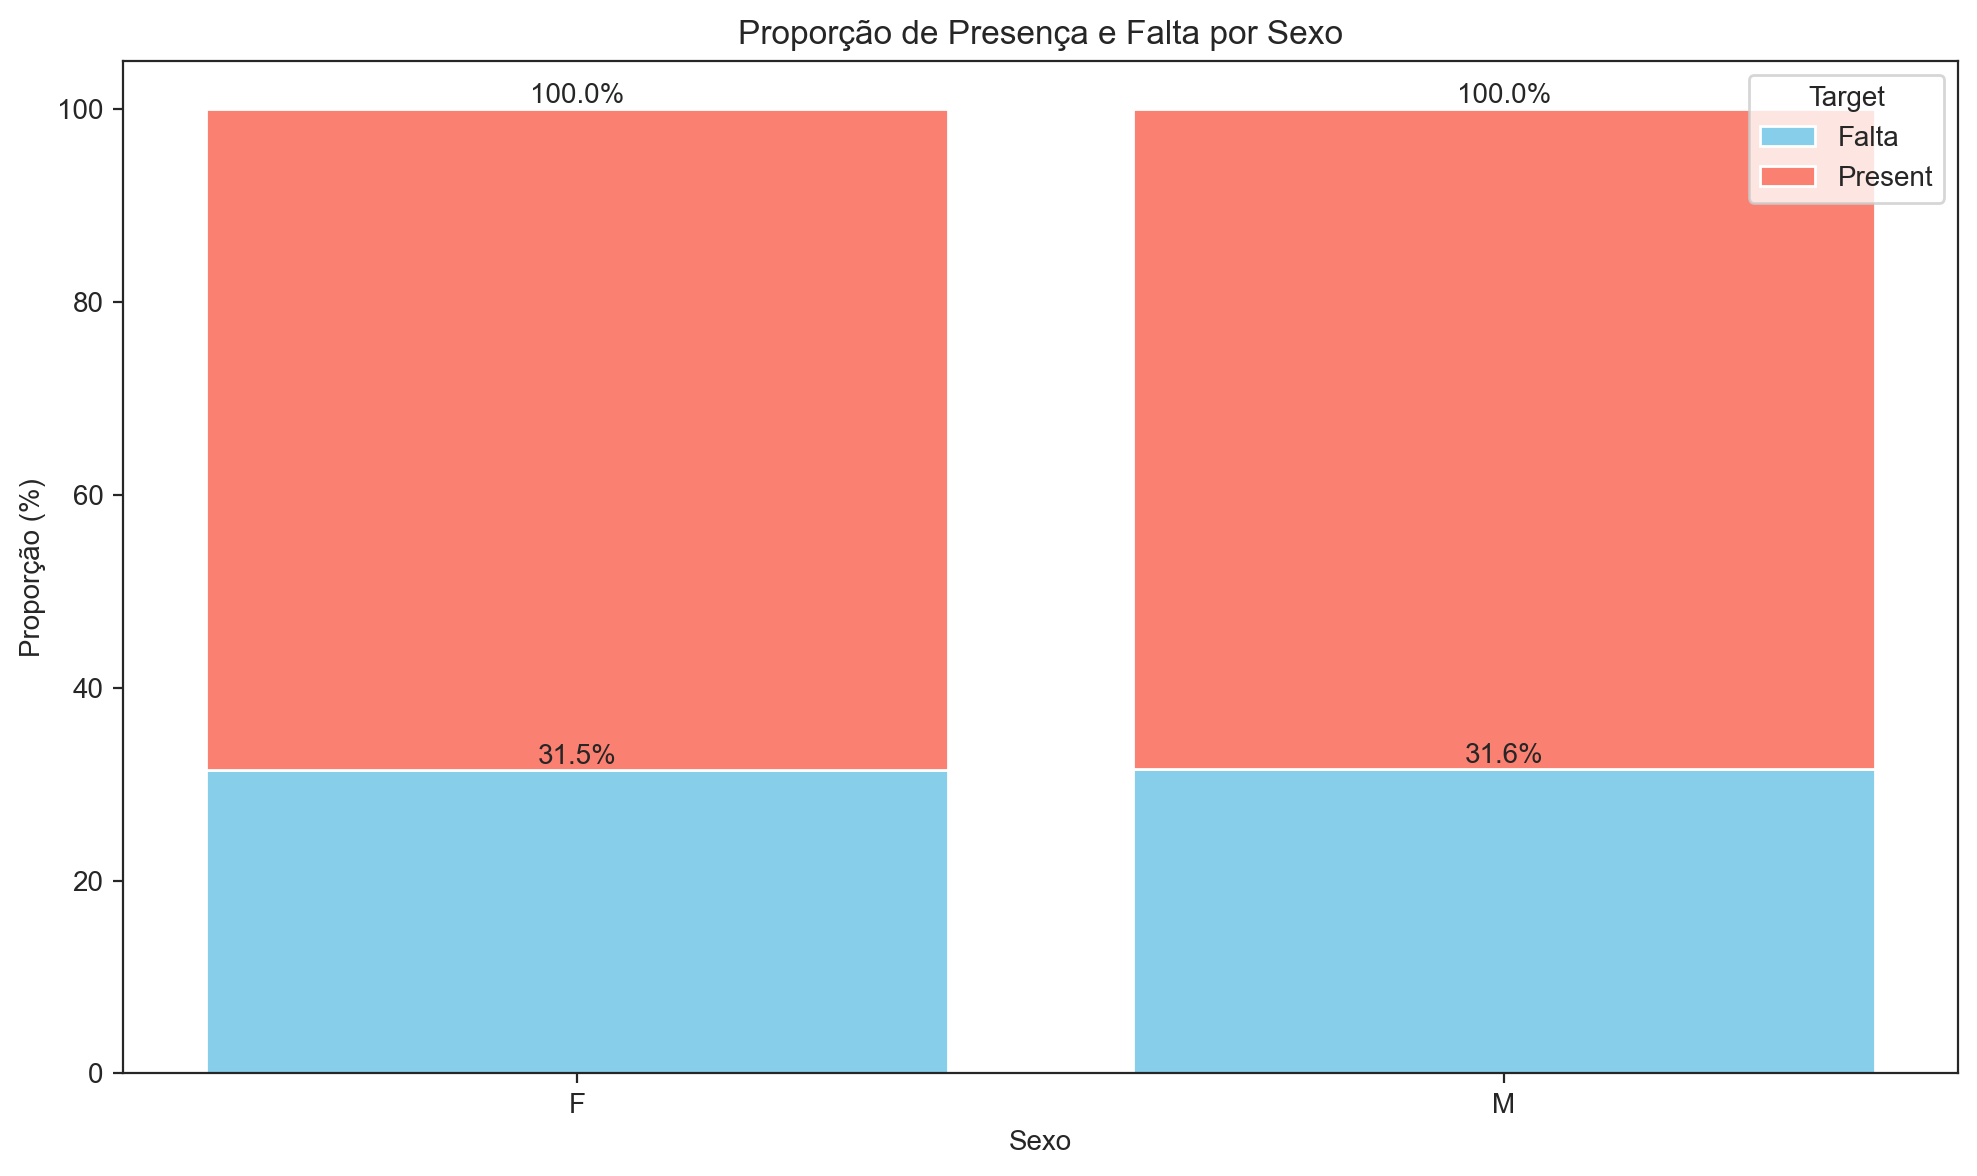

In [20]:

fig, ax = plt.subplots(figsize=(10, 6))


bar_falta = ax.bar(dados_sexo_target2[dados_sexo_target2['target'] == 'falta']['TP_SEXO'], 
                   dados_sexo_target2[dados_sexo_target2['target'] == 'falta']['PROP'], 
                   label='Falta', 
                   color='skyblue')

bar_present = ax.bar(dados_sexo_target2[dados_sexo_target2['target'] == 'present']['TP_SEXO'], 
                     dados_sexo_target2[dados_sexo_target2['target'] == 'present']['PROP'], 
                     bottom=dados_sexo_target2[dados_sexo_target2['target'] == 'falta']['PROP'], 
                     label='Present', 
                     color='salmon')

# Adicionando rótulos às barras
ax.bar_label(bar_falta, fmt='%.1f%%')
ax.bar_label(bar_present, fmt='%.1f%%')

# Configurando o gráfico
ax.set_title('Proporção de Presença e Falta por Sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Proporção (%)')
ax.legend(title='Target')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

- Os resultados do teste qui-quadrado indicam que existe uma associação significativa entre TP_SEXO e target (presença ou falta), dado que o p-valor é 0.0259, que é menor que o limiar comum de 0.05. Isso significa que as diferenças observadas entre os sexos quanto à presença ou falta não são devidas ao acaso.
- Analisando o grafico com as proporcoes, nao ha "diferencas" entre os dois grupos... 
- Pontos para avaliar: 
    - Tamanho da Amostra: Grandes tamanhos de amostra podem detectar diferenças pequenas como estatisticamente significativas.
    - Distribuição dos Dados: A distribuição dos dados nas categorias pode afetar os resultados do teste.

In [22]:
# TP_ESTADO_CIVIL
estado_civil_cat = {
    0:'Nao informado',
    1:'Solteiro(a)',
    2:'Casado(a)/Mora com companheiro(a)',
    3:'Divorciado(a)/Desquitado(a)/Separado(a)',
    4:'Viuvo(a)'
}


dados_estado_civil = data_tmp3[['TP_ESTADO_CIVIL', 'target']]
dados_estado_civil['TP_ESTADO_CIVIL'] = dados_estado_civil['TP_ESTADO_CIVIL'].map(estado_civil_cat)

dados_estado_civil = dados_estado_civil.groupby(['TP_ESTADO_CIVIL', 'target']).size().reset_index()
dados_estado_civil.columns = ['TP_ESTADO_CIVIL', 'target', 'QTDE']

dados_estado_civil = dados_estado_civil.pivot_table(index='TP_ESTADO_CIVIL', columns='target', values='QTDE')

dados_estado_civil['PROP_FALTA'] = dados_estado_civil['falta']/dados_estado_civil.sum(axis=1)*100
dados_estado_civil['PROP_PRESENCA'] = dados_estado_civil['present']/dados_estado_civil.sum(axis=1)*100

display(dados_estado_civil)

target,falta,present,PROP_FALTA,PROP_PRESENCA
TP_ESTADO_CIVIL,,,,
Casado(a)/Mora com companheiro(a),103768.000,96688.000,51.766,48.222
Divorciado(a)/Desquitado(a)/Separado(a),30259.000,34674.000,46.600,53.361
Nao informado,66942.000,104958.000,38.942,61.044
Solteiro(a),1036027.000,2455830.000,29.670,70.330
Viuvo(a),2320.000,2489.000,48.243,51.243


- Casados e Viuvos apresentam maiores proporcoes de faltantes que presentes.
- A maior parcela dos respondentes sao solteiros. Destes, 70% estavam presentes.

In [24]:
# TP_COR_RACA
raca_cor_cat = {
    0:'Nao declarado',
    1:'Branca',
    2:'Preta',
    3:'Parda',
    4:'Amarela',
    5:'Indigena',
    6:'Nao dispoe da informacao'
}

dados_cor_raca = data_tmp3[['TP_COR_RACA', 'target']]
dados_cor_raca['TP_COR_RACA']  = dados_cor_raca['TP_COR_RACA'].map(raca_cor_cat)

dados_cor_raca = dados_cor_raca.groupby(['TP_COR_RACA', 'target']).size().reset_index()
dados_cor_raca.columns = ['TP_COR_RACA', 'TARGET', 'QTDE']

dados_cor_raca2 = dados_cor_raca.pivot_table(index='TP_COR_RACA', columns='TARGET', values = 'QTDE')
dados_cor_raca2['PROP_FALTA'] = dados_cor_raca2['falta']/dados_cor_raca2.sum(axis = 1) * 100
dados_cor_raca2['PROP_PRESENCA'] = 100 - dados_cor_raca2['PROP_FALTA']

display(dados_cor_raca2)

TARGET,falta,present,PROP_FALTA,PROP_PRESENCA
TP_COR_RACA,,,,
Amarela,21533.000,42979.000,33.378,66.622
Branca,415594.000,1160254.000,26.373,73.627
Indigena,10183.000,14528.000,41.208,58.792
Nao declarado,19088.000,33487.000,36.306,63.694
Parda,582314.000,1124484.000,34.117,65.883
Preta,190604.000,318907.000,37.409,62.591


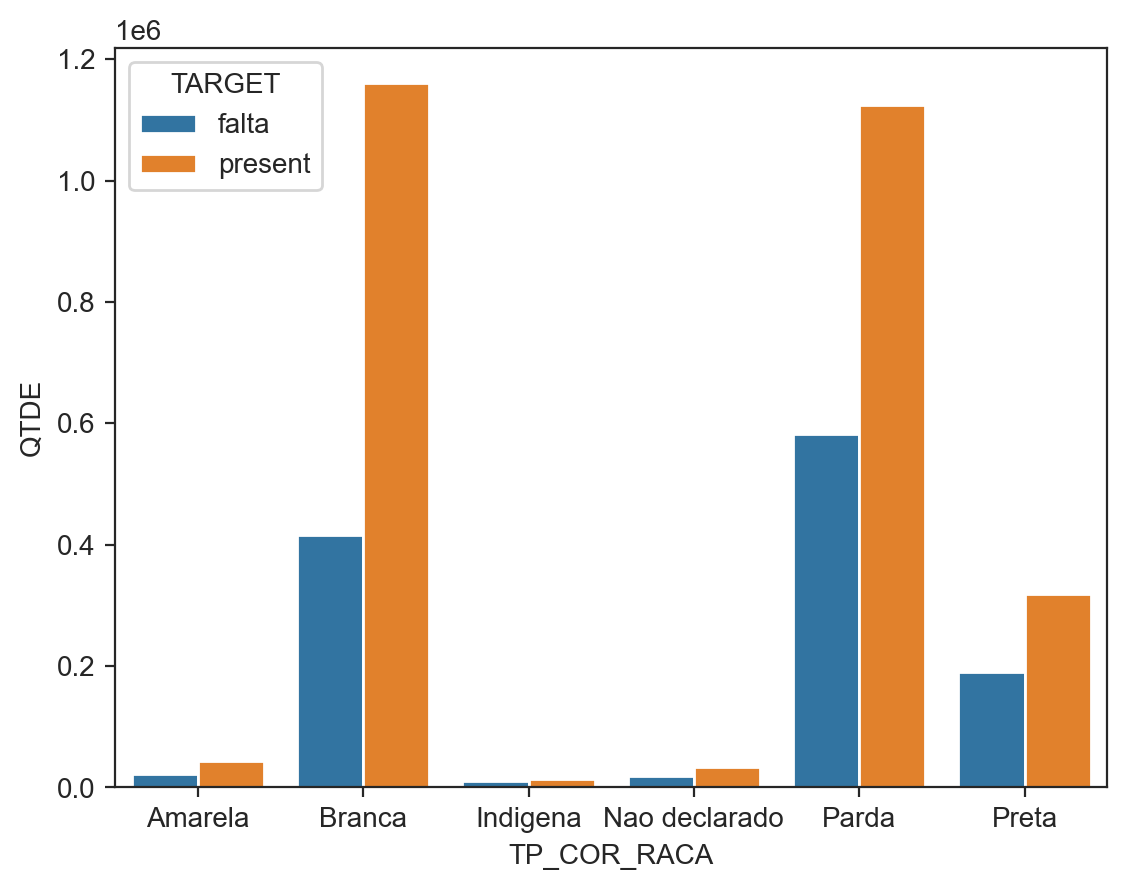

In [25]:
sns.barplot(
    x = 'TP_COR_RACA',
    y = 'QTDE',
    hue = 'TARGET',
    data=dados_cor_raca
)

plt.show()

- A cor/raca indigena apresenta o maior percentual de faltantes.
- A cor/raca branca possui o menor percentual de faltantes.

In [29]:
# Teste para saber se existe diferenca entre os dois grupos
from scipy.stats import chi2_contingency


tabela_contigencia = pd.pivot_table(dados_cor_raca, values = 'QTDE', index = 'TARGET', columns='TP_COR_RACA')
chi2, p, dof, expected = chi2_contingency(tabela_contigencia)

print(f"Qui-quadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Tabela Esperada:")
print(expected)

Qui-quadrado: 34609.39140059419
p-valor: 0.0
Graus de liberdade: 5
Tabela Esperada:
[[  20323.25072147  496440.25922208    7784.71987504   16562.73106835
   537693.50950074  160511.52961231]
 [  44188.74927853 1079407.74077792   16926.28012496   36012.26893165
  1169104.49049926  348999.47038769]]


- Dado o p-valor igual a 0, rejeita-se a hipotese nula. Indicando que existe uma associacao significativa entre as variaveis.

In [30]:
# TP_ST_CONCLUSAO

# Situacao de conclusao do ensino medio

conclusao_cat = {
    1: 'Já concluí o Ensino Médio',
    2: 'Estou cursando e concluirei o Ensino Médio em 2023',
    3: 'Estou cursando e concluirei o Ensino Médio após 2023',
    4: 'Não concluí e não estou cursando o Ensino Médio'
}

dados_st_conclusao = data_tmp3[['TP_ST_CONCLUSAO', 'target']]
dados_st_conclusao['TP_ST_CONCLUSAO'] = dados_st_conclusao['TP_ST_CONCLUSAO'].map(conclusao_cat)

dados_st_conclusao2 = dados_st_conclusao.groupby(['TP_ST_CONCLUSAO', 'target']).size().reset_index()
dados_st_conclusao2.columns = ['TP_ST_CONCLUSAO', 'TARGET', 'QTDE']

dados_st_conclusao2_pivot = dados_st_conclusao2.pivot_table(index = 'TP_ST_CONCLUSAO', columns='TARGET', values = 'QTDE')
dados_st_conclusao2_pivot['PROP_FALTA'] = dados_st_conclusao2_pivot['falta']/dados_st_conclusao2_pivot.sum(axis = 1) * 100
dados_st_conclusao2_pivot['PROP_PRESENCA'] = 100 - dados_st_conclusao2_pivot['PROP_FALTA']

display(dados_st_conclusao2_pivot)

TARGET,falta,present,PROP_FALTA,PROP_PRESENCA
TP_ST_CONCLUSAO,,,,
Estou cursando e concluirei o Ensino Médio após 2023,102770.000,517297.000,16.574,83.426
Estou cursando e concluirei o Ensino Médio em 2023,345199.000,1055965.000,24.637,75.363
Já concluí o Ensino Médio,784100.000,1111201.000,41.371,58.629
Não concluí e não estou cursando o Ensino Médio,7247.000,10176.000,41.594,58.406


- A proporcao de faltantes e maior nos grupos de pessoas que concluiram o ensino medio ou nao concluiram e nao estao cursando.
- Os "treineiros", pessoas que estao cursando e concluirao apos 2023, sao os que apresentam menor proporcao de faltantes.

- Para estes dados, realizar um agrupamento com a variavel "ANO_CONCLUSAO" e com a variavel "IN_TREINEIRO"

In [31]:
# Ano de Conclusao do Ensino Medio

ano_categories = {
    0: 'Não informado',
    1: '2022',
    2: '2021',
    3: '2020',
    4: '2019',
    5: '2018',
    6: '2017',
    7: '2016',
    8: '2015',
    9: '2014',
    10: '2013',
    11: '2012',
    12: '2011',
    13: '2010',
    14: '2009',
    15: '2008',
    16: '2007',
    17: 'Antes de 2007'
}

dados_tp_ano_conclusao = data_tmp3[['TP_ANO_CONCLUIU', 'target']]
dados_tp_ano_conclusao['TP_ANO_CONCLUIU'] = dados_tp_ano_conclusao['TP_ANO_CONCLUIU'].map(ano_categories)

dados_tp_ano_conclusao = dados_tp_ano_conclusao.groupby(['TP_ANO_CONCLUIU', 'target']).size().reset_index()
dados_tp_ano_conclusao.columns = ['TP_ANO_CONCLUIU', 'TARGET', 'QTDE']

dados_tp_ano_conclusao_pivot = dados_tp_ano_conclusao.pivot_table(index = 'TP_ANO_CONCLUIU', columns='TARGET', values='QTDE')
dados_tp_ano_conclusao_pivot['PROP_FALTA'] = dados_tp_ano_conclusao_pivot['falta']/dados_tp_ano_conclusao_pivot.sum(axis = 1)

display(dados_tp_ano_conclusao_pivot)

TARGET,falta,present,PROP_FALTA
TP_ANO_CONCLUIU,,,
2007,10570.000,9901.000,0.516
2008,10775.000,10223.000,0.513
2009,12985.000,11654.000,0.527
2010,14281.000,13140.000,0.521
2011,15054.000,13947.000,0.519
2012,18272.000,17240.000,0.515
2013,20383.000,19537.000,0.511
2014,23686.000,22968.000,0.508
2015,26966.000,27803.000,0.492


In [32]:
# IN_TREINEIRO

dados_treineiro = data_tmp3[['IN_TREINEIRO', 'target']]
dados_treineiro = dados_treineiro.groupby(['IN_TREINEIRO', 'target']).size().reset_index()
dados_treineiro.columns = ['IN_TREINEIRO', 'target', 'QTDE']
dados_treineiro = dados_treineiro.pivot_table(index='IN_TREINEIRO', columns='target', values='QTDE')

dados_treineiro['PROP_FALTA'] = dados_treineiro['falta']/dados_treineiro.sum(axis = 1)*100
dados_treineiro

target,falta,present,PROP_FALTA
IN_TREINEIRO,,,
0,1136546.000,2177342.000,34.296
1,102770.000,517297.000,16.574


- A proporcao de treineiros ausentes e maior que a proporcao de nao treineiros.

## 3.2. Dados do Questionario Socioeconomico - Relacao dos ausentes e presentes 

In [34]:
# Até que série seu pai, ou o homem responsável por você, estudou?

educacao_pais = {
    'H': 'Não sei.',
    'A': 'Nunca estudou.',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.'
    
}

In [35]:
# Q001 - Educacao Pai

educacao_pai_2 = data_tmp3[['Q001', 'target']]
educacao_pai_2['Q001'] = educacao_pai_2['Q001'].map(educacao_pais)
educacao_pai_2 = educacao_pai_2.value_counts().reset_index()
educacao_pai_2.columns = ['Q001', 'target','QTDE']

categories = list(educacao_pais.values())

educacao_pai_2['Q001'] = pd.Categorical(
    educacao_pai_2['Q001'],
    categories=categories,
    ordered=True
)

educacao_pai_2 = educacao_pai_2.pivot_table(index='Q001', columns='target', values = 'QTDE')
educacao_pai_2['PROP_PRESE'] = educacao_pai_2['present']/educacao_pai_2.sum(axis=1)
educacao_pai_2 = educacao_pai_2.sort_values('Q001')
educacao_pai_2

target,falta,present,PROP_PRESE
Q001,,,
Não sei.,152193.000,251333.000,0.623
Nunca estudou.,77624.000,97088.000,0.556
Não completou a 4ª série/5º ano do Ensino Fundamental.,287619.000,412556.000,0.589
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",179722.000,333491.000,0.650
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",139195.000,298944.000,0.682
"Completou o Ensino Médio, mas não completou a Faculdade.",300497.000,813667.000,0.730
"Completou a Faculdade, mas não completou a Pós-graduação.",62557.000,271424.000,0.813
Completou a Pós-graduação.,39909.000,216136.000,0.844


- Conforme o aumento da escolaridade do pai, a proporcao de presenca aumenta.
- Esses valores mostram uma relacao entre a educacao com a presenca do aluno.

In [36]:
# Q002 - Educacao Mae

educacao_mae_2 = data_tmp3[['Q002', 'target']]
educacao_mae_2['Q002'] = educacao_mae_2['Q002'].map(educacao_pais)
educacao_mae_2 = educacao_mae_2.value_counts().reset_index()
educacao_mae_2.columns = ['Q002', 'target','QTDE']

categories = list(educacao_pais.values())

educacao_mae_2['Q002'] = pd.Categorical(
    educacao_mae_2['Q002'],
    categories=categories,
    ordered=True
)

educacao_mae_2 = educacao_mae_2.pivot_table(index='Q002', columns='target', values = 'QTDE')
educacao_mae_2['PROP_PRESE'] = educacao_mae_2['present']/educacao_mae_2.sum(axis=1)
educacao_mae_2 = educacao_mae_2.sort_values('Q002')
educacao_mae_2

target,falta,present,PROP_PRESE
Q002,,,
Não sei.,53792.000,78165.000,0.592
Nunca estudou.,52575.000,58256.000,0.526
Não completou a 4ª série/5º ano do Ensino Fundamental.,223263.000,282262.000,0.558
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",169640.000,267382.000,0.612
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",168108.000,305746.000,0.645
"Completou o Ensino Médio, mas não completou a Faculdade.",401233.000,976372.000,0.709
"Completou a Faculdade, mas não completou a Pós-graduação.",93989.000,361279.000,0.794
Completou a Pós-graduação.,76716.000,365177.000,0.826


- O mesmo cenario apresentado para a escolaridade do pai tambem ocorre para a escolaridade da mae. 

In [37]:
# Q003: A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a 
# ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, 
# escolha uma ocupação pensando no último trabalho dele).

ocupacao_pai = data_tmp3[['Q003', 'target']]
ocupacao_pai = ocupacao_pai.groupby(['Q003', 'target']).size().reset_index()
ocupacao_pai.columns = ['Q003', 'TARGET', 'QTDE']

ocupacao_pai = ocupacao_pai.pivot_table(index='Q003', columns='TARGET', values='QTDE')
ocupacao_pai['PROP_FALTA'] = ocupacao_pai['falta']/ocupacao_pai.sum(axis = 1)*100

ocupacao_pai

TARGET,falta,present,PROP_FALTA
Q003,,,
A,279021.000,471757.000,37.164
B,280789.000,509384.000,35.535
C,297508.000,614248.000,32.630
D,150262.000,556513.000,21.260
E,46939.000,221253.000,17.502
F,184797.000,321484.000,36.501


- A proporcao de faltas e menor em grupos profissionais que exigem maior tempo de estudo ou ensino superior (Grupo D formado por professores, tecnicos, ... e Grupo 5 formado por medicos, engenheiros...).
- A proporcao de faltas no Grupo F (pessoas que nao sabem a profissao do pai) e a segunda maior.

In [38]:
# Q004: A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla 
# a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, 
# escolha uma ocupação pensando no último trabalho dela).

ocupacao_mae = data_tmp3[['Q004', 'target']]
ocupacao_mae = ocupacao_mae.groupby(['Q004', 'target']).size().reset_index()
ocupacao_mae.columns = ['Q004', 'TARGET', 'QTDE']

ocupacao_mae = ocupacao_mae.pivot_table(index='Q004', columns='TARGET', values='QTDE')
ocupacao_mae['PROP_FALTA'] = ocupacao_mae['falta']/ocupacao_mae.sum(axis = 1)*100

ocupacao_mae

TARGET,falta,present,PROP_FALTA
Q004,,,
A,230271.000,377856.000,37.866
B,579284.000,1053387.000,35.481
C,82931.000,164227.000,33.554
D,192305.000,700115.000,21.549
E,34871.000,165713.000,17.385
F,119654.000,233341.000,33.897


- Comportamento similar ao que ocorre na variavel Q003 para os pais.

In [39]:
# Q005 - Incluindo você, quantas pessoas moram atualmente em sua residência?

qtde_moradores_residencia = data_tmp3[['Q005', 'target']]
qtde_moradores_residencia = qtde_moradores_residencia.groupby(['Q005', 'target']).size().reset_index()
qtde_moradores_residencia.columns = ['Q005', 'TARGET', 'QTDE']

qtde_moradores_residencia = qtde_moradores_residencia.pivot_table(index='Q005',
                                                                  columns='TARGET',
                                                                  values = 'QTDE')

qtde_moradores_residencia['PROP_FALTA'] = qtde_moradores_residencia['falta']/qtde_moradores_residencia.sum(axis=1) * 100
qtde_moradores_residencia

TARGET,falta,present,PROP_FALTA
Q005,,,
1,73962.000,72913.000,50.357
2,215524.000,352111.000,37.969
3,325690.000,760984.000,29.971
4,337953.000,909306.000,27.096
5,172399.000,393926.000,30.442
6,66488.000,127644.000,34.249
7,26140.000,44909.000,36.792
8,11572.000,18396.000,38.615
9,4329.000,6863.000,38.679


In [40]:
# Q006: Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

renda_cat = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.320,00',
    'C': 'De R$ 1.320,01 até R$ 1.980,00',
    'D': 'De R$ 1.980,01 até R$ 2.640,00',
    'E': 'De R$ 2.640,01 até R$ 3.300,00',
    'F': 'De R$ 3.300,01 até R$ 3.960,00',
    'G': 'De R$ 3.960,01 até R$ 5.280,00',
    'H': 'De R$ 5.280,01 até R$ 6.600,00',
    'I': 'De R$ 6.600,01 até R$ 7.920,00',
    'J': 'De R$ 7.920,01 até R$ 9.240,00',
    'K': 'De R$ 9.240,01 até R$ 10.560,00',
    'L': 'De R$ 10.560,01 até R$ 11.880,00',
    'M': 'De R$ 11.880,01 até R$ 13.200,00',
    'N': 'De R$ 13.200,01 até R$ 15.840,00',
    'O': 'De R$ 15.840,01 até R$ 19.800,00',
    'P': 'De R$ 19.800,01 até R$ 26.400,00',
    'Q': 'Acima de R$ 26.400,00'
}

dados_renda = data_tmp3[['Q006', 'target']]
dados_renda['Q006'] = dados_renda['Q006'].map(renda_cat)

dados_renda = dados_renda.groupby(['Q006', 'target']).size().reset_index()
dados_renda.columns = ['Q006', 'target', 'QTDE']
dados_renda = dados_renda.pivot_table(index='Q006', columns='target', values = 'QTDE')
dados_renda['PROP_FALTA'] = dados_renda['falta']/dados_renda.sum(axis = 1) * 100

categories = list(renda_cat.values())

dados_renda.index = pd.Categorical(
    dados_renda.index,
    categories=categories,
    ordered=True
)

dados_renda

dados_renda.sort_index()

target,falta,present,PROP_FALTA
Nenhuma Renda,111227.000,156826.000,41.494
"Até R$ 1.320,00",460979.000,784292.000,37.018
"De R$ 1.320,01 até R$ 1.980,00",234115.000,416827.000,35.966
"De R$ 1.980,01 até R$ 2.640,00",139940.000,297426.000,31.996
"De R$ 2.640,01 até R$ 3.300,00",83417.000,210577.000,28.374
"De R$ 3.300,01 até R$ 3.960,00",43485.000,127859.000,25.379
"De R$ 3.960,01 até R$ 5.280,00",58570.000,202757.000,22.413
"De R$ 5.280,01 até R$ 6.600,00",28279.000,111000.000,20.304
"De R$ 6.600,01 até R$ 7.920,00",16160.000,69810.000,18.797
"De R$ 7.920,01 até R$ 9.240,00",13141.000,62038.000,17.480


- A maior proporcao de faltas sao para os grupos que nao possuem renda ou possuem rendas inferiores.
- Conforme a renda aumenta, a proporcao de ausencias reduz (exceto para rendas acima de R$26,4)

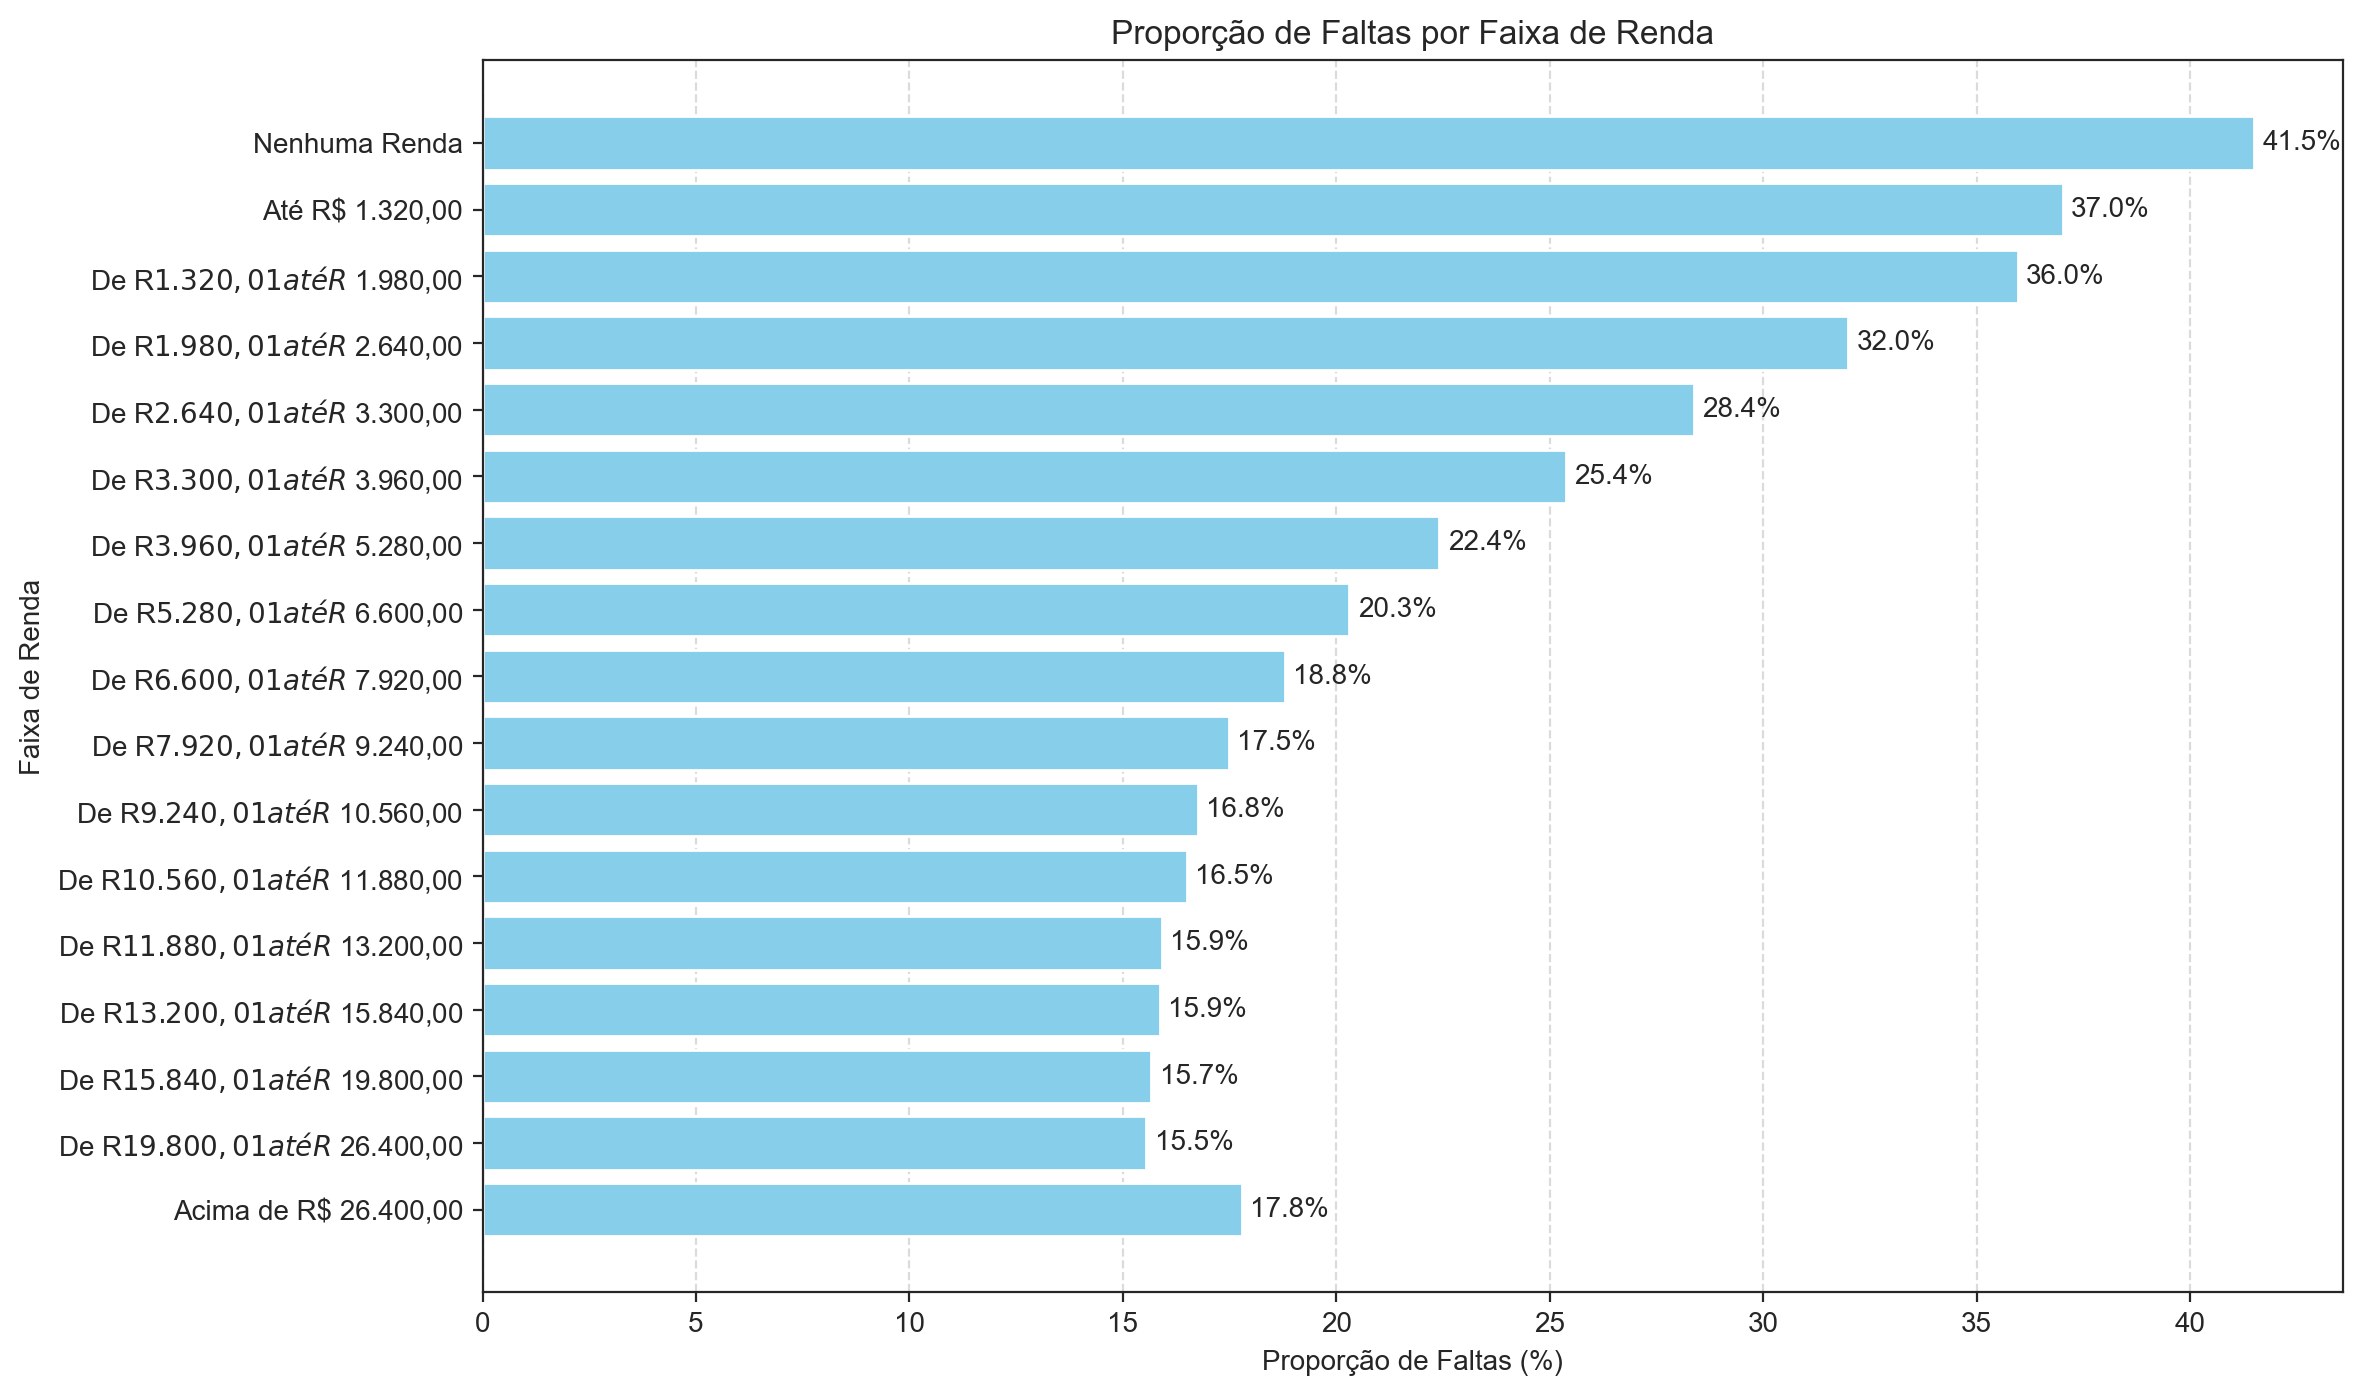

In [41]:
df = dados_renda.sort_index()

plt.figure(figsize=(12, 8))

ax = plt.gca()
bars = ax.barh(df.index, df['PROP_FALTA'], color='skyblue')

plt.xlabel('Proporção de Faltas (%)')
plt.ylabel('Faixa de Renda')
plt.title('Proporção de Faltas por Faixa de Renda')
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{width:.1f}%',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),  # Espaçamento do texto
                textcoords="offset points",
                ha='left', va='center')


    
plt.show()

In [42]:
# Q007 Em sua residência trabalha empregado(a) doméstico(a)?

empregado_cat = {
    'A': 'Nao',
    'B': 'Sim, um ou dois dias por semana.',
    'C': 'Sim, três ou quatro dias por semana.',
    'D': 'Sim, pelo menos cinco dias por semana.'
}

empregado_residencia = data_tmp3[['Q007', 'target']]
empregado_residencia['Q007'] = empregado_residencia['Q007'].map(empregado_cat)
empregado_residencia = empregado_residencia.groupby(['Q007', 'target']).size().reset_index()
empregado_residencia.columns = ['Q007', 'target', 'QTDE']

empregado_residencia = empregado_residencia.pivot_table(index='Q007', columns='target', values='QTDE')
empregado_residencia['PROP_FALTA'] = empregado_residencia['falta']/empregado_residencia.sum(axis = 1)*100
empregado_residencia

target,falta,present,PROP_FALTA
Q007,,,
Nao,1164195.000,2446984.000,32.239
"Sim, pelo menos cinco dias por semana.",23320.000,81050.000,22.344
"Sim, três ou quatro dias por semana.",9703.000,30179.000,24.329
"Sim, um ou dois dias por semana.",42098.000,136426.000,23.581


- A maior proporcao de ausentes esta nas casas que nao possuem empregados.
- Essa variavel, possivelmente, possui relacao com variaveis de salario e profissao dos pais.
- As proporcoes para as casas com empregado (a) domestico (a) sao similares para aqueles que possuem um ou mais dias. 

In [43]:
# Q008: Na sua residência tem banheiro?
# Q009: Na sua residência tem quartos para dormir?
# Q010: Na sua residência tem carro?
# Q011: Na sua residência tem motocicleta?
# Q012: Na sua residência tem geladeira?
# Q013: Na sua residência tem freezer (independente ou segunda porta da geladeira)?
# Q014: Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)
# Q015: Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?
# Q016: Na sua residência tem forno micro-ondas?
# Q017: Na sua residência tem máquina de lavar louça?
# Q019: Na sua residência tem televisão em cores?
# Q022: Na sua residência tem telefone celular?
# Q024: Na sua residência tem computador?


perguntas_categorias = {
    'A': 'Nao',
    'B': 'Sim, uma',
    'C': 'Sim, duas',
    'D': 'Sim, tres',
    'E': 'Sim, quatro ou mais'
}

categories = list(perguntas_categorias.values())

In [44]:

colunas = ['Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q019','Q022', 'Q024', 'target']

tabela_perguntas2 = data_tmp3[colunas]

tabela_perguntas2.iloc[:, :-1] = tabela_perguntas2.iloc[:, :-1].applymap(lambda x: perguntas_categorias.get(x, 'Categoria Desconhecida'))

In [45]:
tabela_melted2 = tabela_perguntas2.melt(id_vars='target', var_name='Pergunta', value_name='Categoria')
tabela_melted2 = tabela_melted2.groupby(['Categoria', 'Pergunta', 'target']).size().reset_index(name = 'Quantidade')

tabela_melted2

,Categoria,Pergunta,target,Quantidade
0,Nao,Q008,falta,15090
1,Nao,Q008,present,22788
2,Nao,Q009,falta,15160
3,Nao,Q009,present,19309
4,Nao,Q010,falta,813388
...,...,...,...,...
125,"Sim, uma",Q019,present,1721117
126,"Sim, uma",Q022,falta,319039
127,"Sim, uma",Q022,present,445822
128,"Sim, uma",Q024,falta,389851


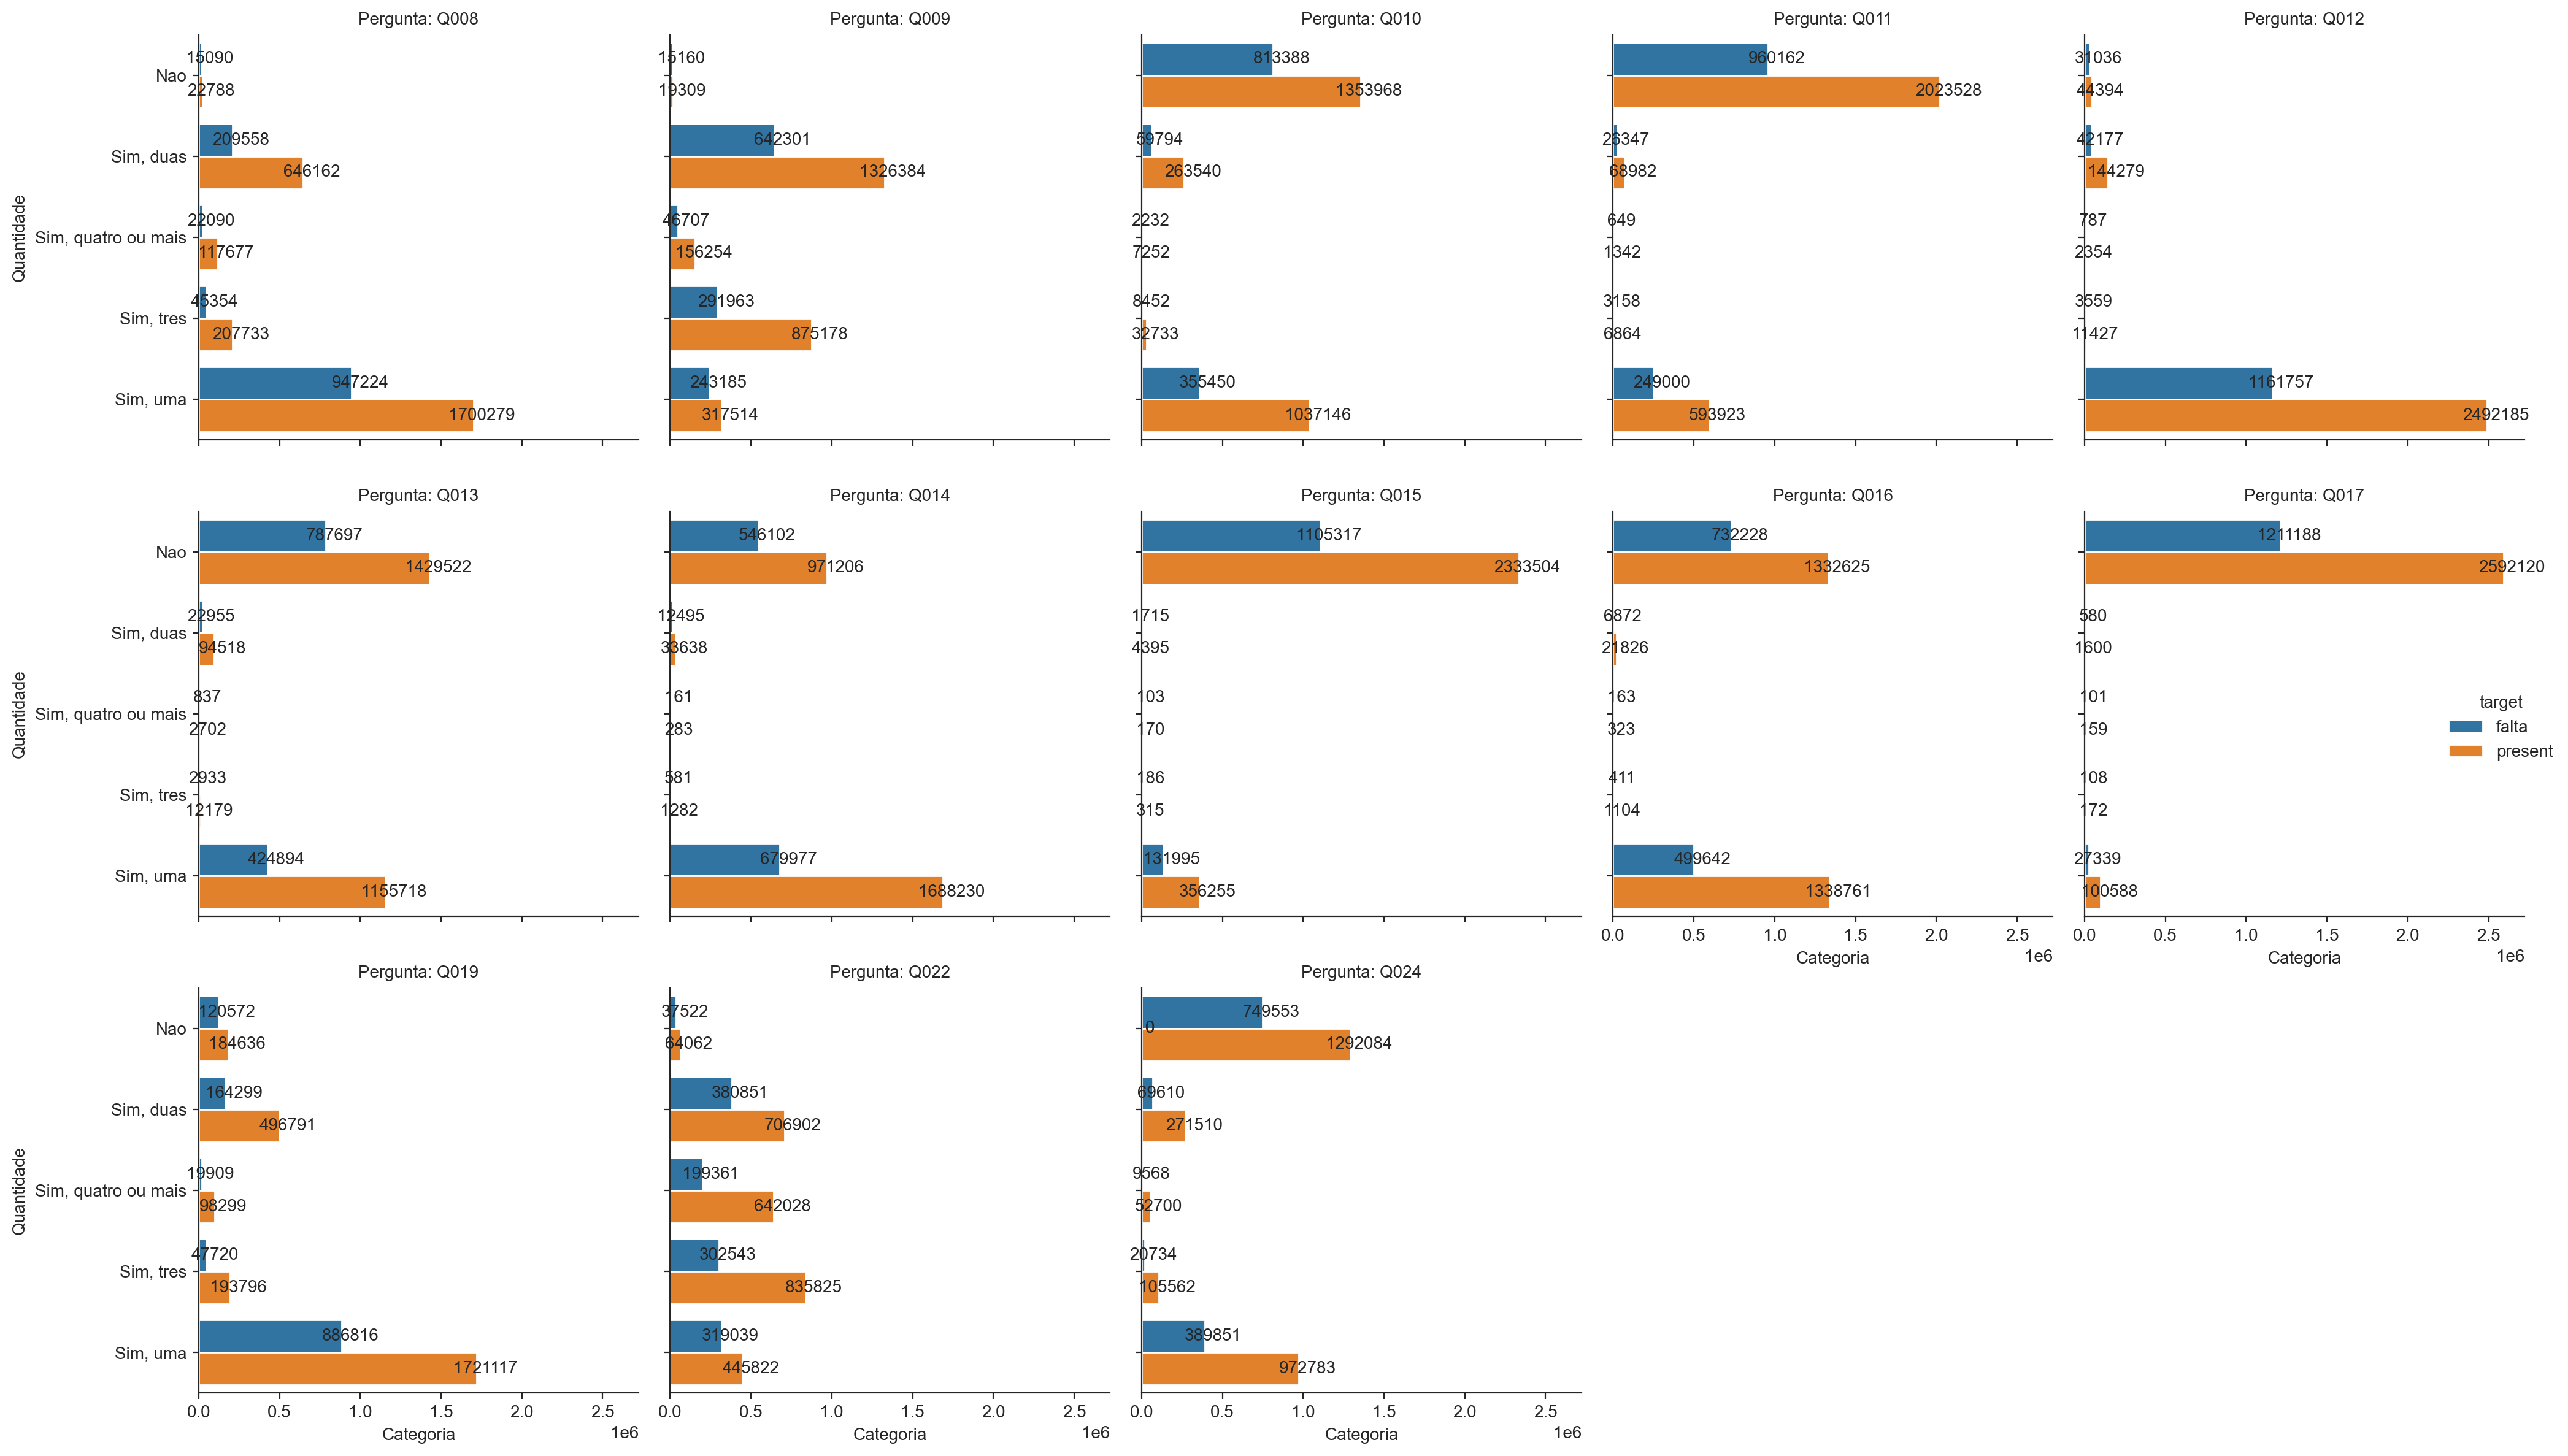

In [46]:
# Definir o número de colunas e linhas
num_colunas = 5
num_perguntas = tabela_melted2['Pergunta'].nunique()
num_linhas = -(-num_perguntas // num_colunas)  # Divisão inteira arredondando para cima

# Criar gráficos de barras em uma grade de subplots usando catplot
g = sns.catplot(
    y='Categoria', 
    x='Quantidade',
    hue = 'target',
    col='Pergunta', 
    data=tabela_melted2, 
    kind='bar', 
    col_wrap=num_colunas,
    height=4,
    aspect=1
)

# Adicionar labels nas barras
for ax in g.axes.flat:
    for p in ax.patches:
        width = p.get_width()
        if not pd.isna(width):  # Adicionar checagem para valores NaN
            ax.annotate(f'{int(width)}', 
                        (width, p.get_y() + p.get_height() / 2.), 
                        ha='center', va='center', xytext=(5, 0), 
                        textcoords='offset points')

# Ajustar os títulos e os rótulos
g.set_titles("Pergunta: {col_name}")
g.set_axis_labels("Categoria", "Quantidade")
# g.set_xticklabels(rotation=45)

plt.tight_layout()
plt.show()

In [47]:
colunas = ['Q018', 'Q020', 'Q021', 'Q023', 'Q025', 'target']

dados_colunas2 = data_tmp3[colunas]
dados_colunas2

,Q018,Q020,Q021,Q023,Q025,target
0,B,A,B,A,B,falta
1,B,A,A,A,B,falta
2,A,A,A,A,B,present
3,A,A,A,A,B,present
4,A,A,A,A,A,present
...,...,...,...,...,...,...
3933950,A,A,B,A,B,present
3933951,B,B,B,B,B,present
3933952,A,A,A,A,B,falta
3933953,B,A,A,A,B,present


In [48]:
dados_colunas_melted_2 = dados_colunas2.melt(id_vars='target',var_name='Pergunta', value_name='Categoria')
dados_colunas_melted_2 = dados_colunas_melted_2.groupby(['Categoria', 'Pergunta', 'target']).size().reset_index(name = 'Quantidade')


dados_colunas_melted_2_pivot = dados_colunas_melted_2.pivot_table(index='Categoria', columns=['Pergunta', 'target'], values='Quantidade', fill_value=0)

dados_colunas_melted_2_pivot

Pergunta         Q018                    Q020                    Q021  \
target          falta     present       falta     present       falta   
Categoria                                                               
A         1035755.000 1996454.000 1117554.000 2313031.000 1037364.000   
B          203561.000  698185.000  121762.000  381608.000  201952.000   

Pergunta                     Q023                    Q025              
target        present       falta     present       falta     present  
Categoria                                                              
A         2062641.000 1156952.000 2422665.000  151146.000  224358.000  
B          631998.000   82364.000  271974.000 1088170.000 2470281.000

- Em relacao as perguntas dos itens que possui em casa, nao ha nenhuma variavel que possui alguma categoria onde os "ausentes" destacam-se dos presentes.

In [49]:
dados_treineiro = data_tmp3[['TP_ANO_CONCLUIU', 'IN_TREINEIRO', 'TP_ST_CONCLUSAO']]
dados_treineiro.groupby(['TP_ANO_CONCLUIU', 'IN_TREINEIRO', 'TP_ST_CONCLUSAO']).size()

TP_ANO_CONCLUIU  IN_TREINEIRO  TP_ST_CONCLUSAO
0                0             1                   204480
                               2                  1401164
                               4                    17423
                 1             3                   620067
1                0             1                   418530
2                0             1                   264183
3                0             1                   149798
4                0             1                   136449
5                0             1                   104195
6                0             1                    85411
7                0             1                    65549
8                0             1                    54769
9                0             1                    46654
10               0             1                    39920
11               0             1                    35512
12               0             1                    29001
13               0       

- Todos os "treineiros" possuem o TP_ST_CONCLUSAO como "Estou cursando e concluirei o Ensino Médio após 2023". Neste caso, considerar apenas uma variavel.

## Em Atualizacao - Teste de Hipoteses para as variaveis categoricas

In [50]:
def teste_hipotese_categoricas(dados, target, categorical_vars):
    resultados = []

    for var in categorical_vars:
        contingency_table = pd.crosstab(dados[var], target)
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        result = {
            'Variable': var,
            'p-value': p,
            'Chi2': chi2,
            'Degrees of Freedom': dof,
            'Significant': p < 0.05
        }
        resultados.append(result)

    return pd.DataFrame(resultados)

In [51]:
categorical_vars = data_tmp2.columns.to_list()
resultados = teste_hipotese_categoricas(data_tmp2, data_tmp2['target'], categorical_vars)

print(resultados)

NameError: name 'data_tmp2' is not defined